In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse.linalg import eigsh
from scipy.linalg import norm

In [81]:
def System(r,t):
    
    x=r[0]
    y=r[1]
    
    dx=(2*x)-y
    dy=x+(2*y)
    
    return [dx,dy]

In [82]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]

    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],vx[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    vx[1] = vx[0] + h*K11[1]
    
    xc = x.copy()
    vxc = vx.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        vx[i] = vx[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([x[i],vx[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        vxc[i] = vxc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return x,vx,xc,vxc

In [83]:
t = np.linspace(0,20,10000)
h = t[1] - t[0]
r0 = [0.+h,0.+h]
solucion = IntegratorAdams(System,r0,t)
solucion_teorica = odeint(System,r0,t)



Punto a


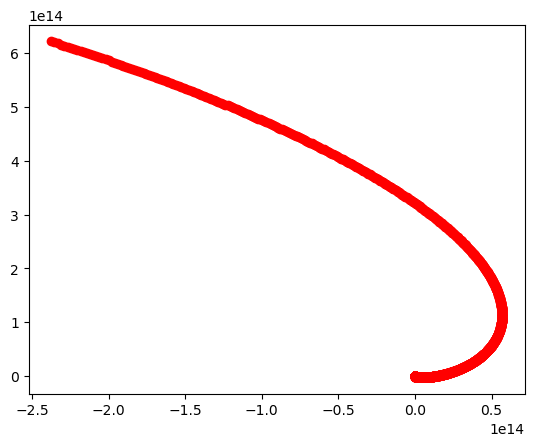

In [85]:
print("Punto a")
plt.scatter(solucion[0],solucion[1],color='r')


In [86]:
print("Punto b y c")
print("La matriz de estabilidad es:")
Matriz_estabilidad=np.array([[2,-1],[1,2]])
print(Matriz_estabilidad)
w,v= eigsh(Matriz_estabilidad,k=len(Matriz_estabilidad),which='LM')
valores_propios=w
vectores_propios=v
print("Sus valores propios son:")
print(valores_propios)
print("Sus vectores propios son:")
print(vectores_propios)


Punto b y c
La matriz de estabilidad es:
[[ 2 -1]
 [ 1  2]]
Sus valores propios son:
[1. 3.]
Sus vectores propios son:
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


Punto d
La trayectoria sobre el espacio fase es:


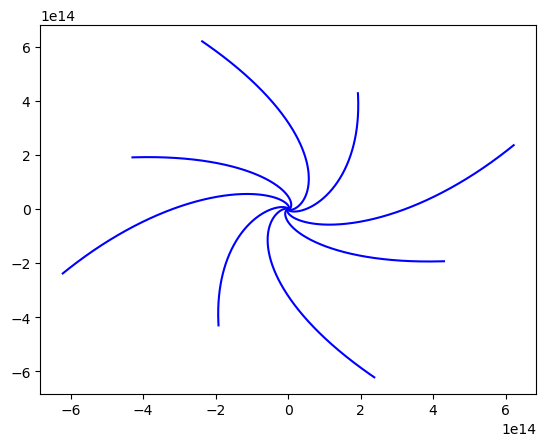

In [87]:
print("Punto d")
print("La trayectoria sobre el espacio fase es:")

fig=plt.figure()
ax=fig.add_subplot()

r=[(0+h,0),(0-h,0),(0,0+h),(0,0-h),(0+h,0+h),(0-h,0-h),(0-h,0+h),(0+h,0-h)]

for i in r:
    answer=IntegratorAdams(System,i,t)
    ax.plot(answer[0],answer[1],c="b")
   
x=np.arange(1,1000)
y=np.arange(1,1000)

X,Y = np.meshgrid(x,y)
ax.quiver(X,Y,System([X,Y],t)[0],System([X,Y],t)[1])



In [88]:
print("El punto crítico es 0.0")

El punto crítico es 0.0
